GENERALISED AUTOREGRESSIVE CONDITIONAL HETEROSKEDASTICITY GARCH(P,Q) MODELS FOR TIME SERIES ANALYSIS 
======================================================

Ref: 
https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis

GARCH(1,1)
-------

alpha0=0.2, alpha1=0.5, beta1=0.3

To create the GARCH(1,1) model in R we need to perform a similar procedure as for our original random walk simulations. That is, we need to create a vector **w** to store our random white noise values, then a separate vector **eps** to store our time series values and finally a vector **sigsq** to store the ARMA variances.

In [1]:
set.seed(2)
a0 <- 0.2
a1 <- 0.5
b1 <- 0.3
w <- rnorm(10000)
eps <- rep(0,10000)  #create a vector of zeros
sigsq <- rep(0,10000)
for (i in 2:10000) {
    sigsq[i] <- a0 + a1 * (eps[i-1]^2) + b1*sigsq[i-1]
    eps[i] <- w[i]*sqrt(sigsq[i])
}

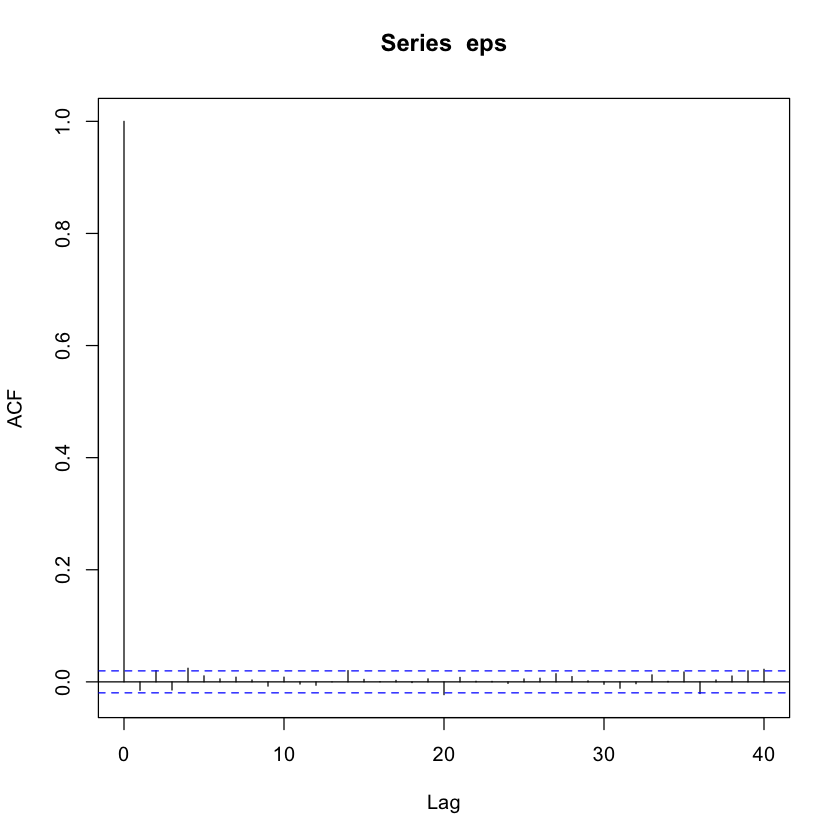

In [2]:
acf(eps)

Notice that the series look like a realisation of a DWN process.

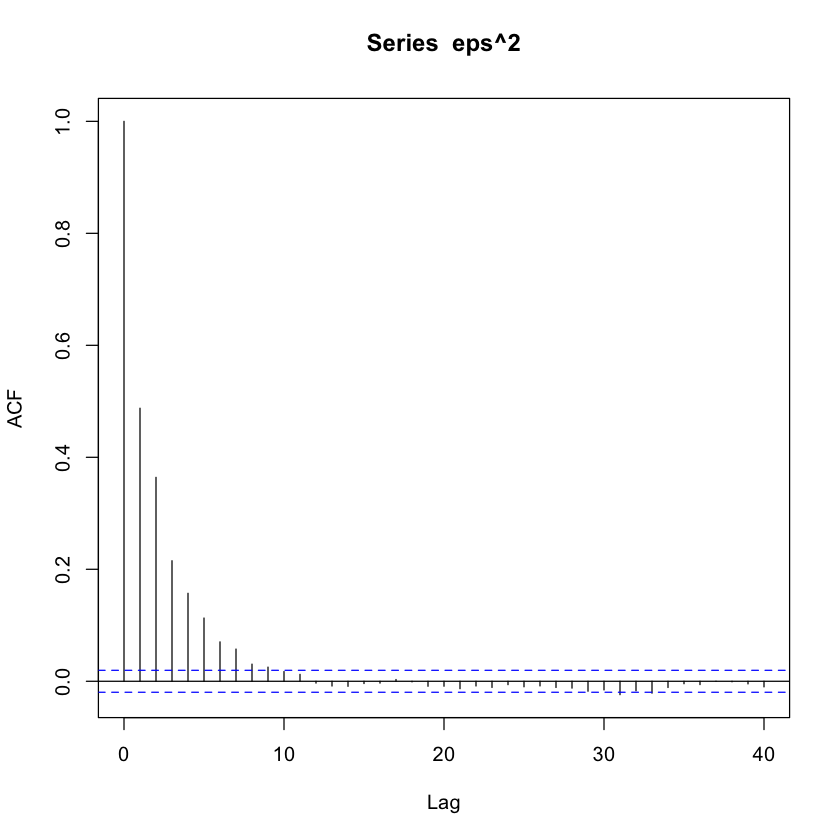

In [3]:
acf(eps^2)

We see substantial evidence of a conditionally heteroskedastic process via the decay of successive lags. 

In [4]:
require(tseries)

Loading required package: tseries


In [6]:
eps.garch <- garch(eps, trace=FALSE)
confint(eps.garch)  #produce confidence intervals

,2.5 %,97.5 %
a0,0.1786255,0.2172683
a1,0.4271900,0.5044903
b1,0.2861566,0.3602687


We can see that the true parameters all fall within the respective CIs.
Financial Data
--------------
Let's try fitting ARIMA and GARCH to the S&P500.

**ARIMA**

In [16]:
library('TTR')
require(quantmod)
getSymbols("^GSPC")

[1] "GSPC"

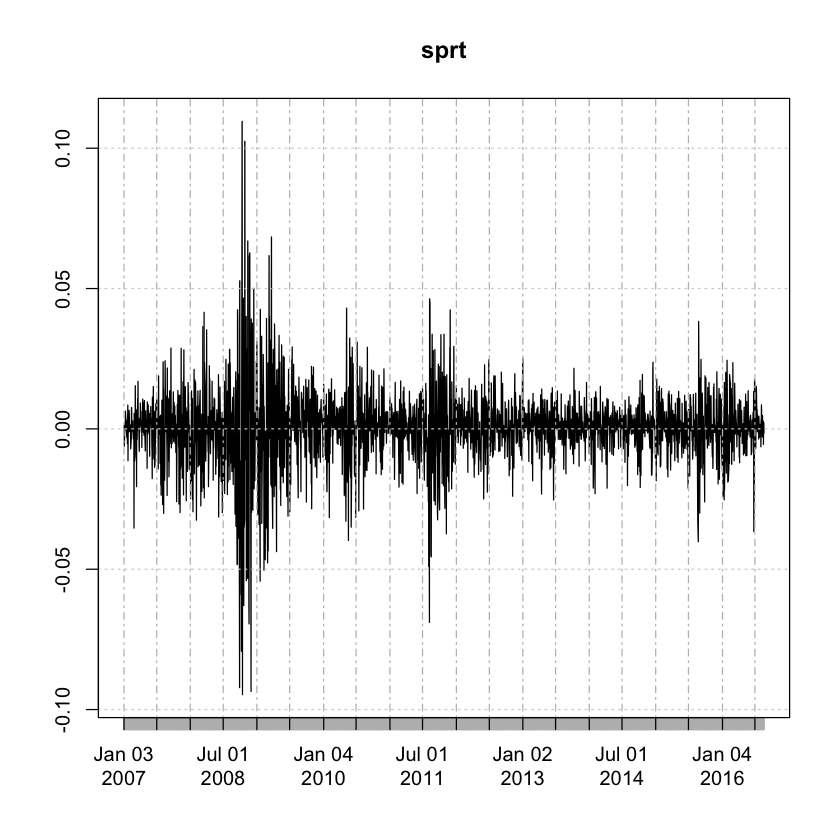

In [18]:
sprt=diff(log(Cl(GSPC)))
plot(sprt)

We also need to remove the **NA** value generated by the differencing procedure:

In [19]:
sp <- as.numeric(sprt)
sp <- sp[!is.na(sp)]

In [20]:
spfinal.aic <- Inf
spfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
    spcurrent.aic <- AIC(arima(sp, order=c(p,d,q)))
    if (spcurrent.aic <- spfinal.aic){
        spfinal.aic <- spcurrent.aic
        spfinal.order <- c(p,d,q)
        spfinal.arima <- arima(sp, order=spfinal.order)
    }
}

In [21]:
spfinal.order

[1] 4 1 4

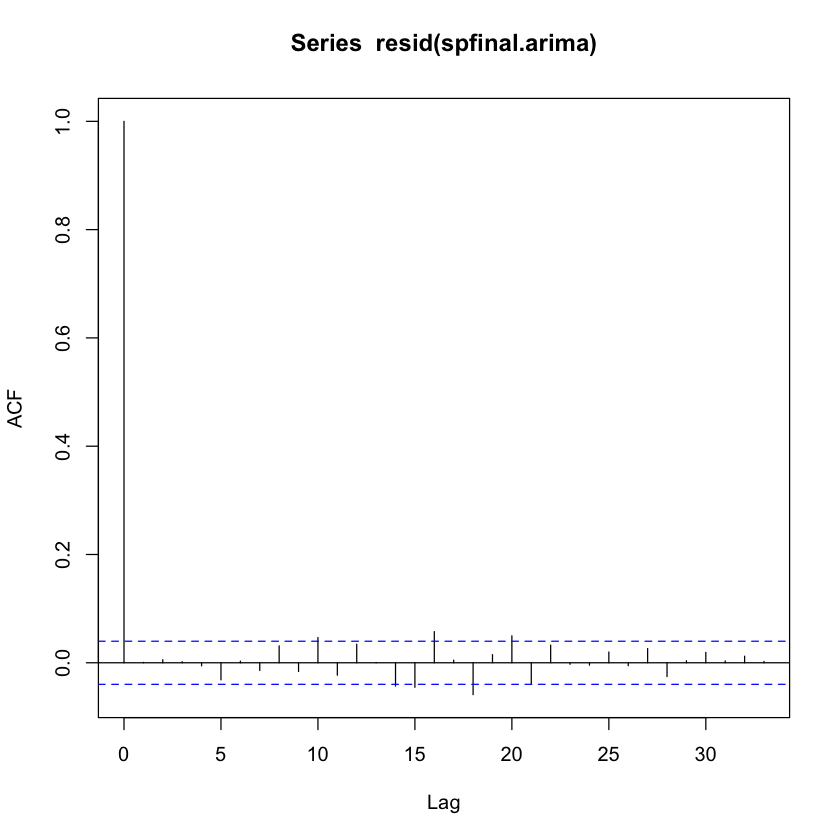

In [23]:
acf(resid(spfinal.arima))

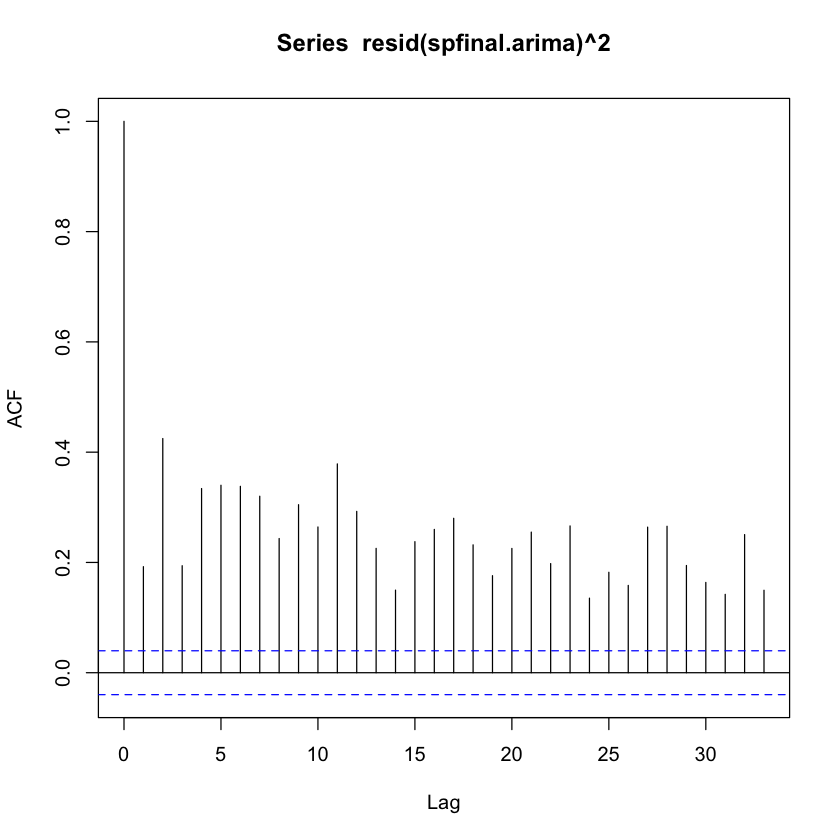

In [24]:
acf(resid(spfinal.arima)^2)

We can see clear evidence of serial correlation in the squared residuals, leading us to the conclusion that conditional heteroskedastic behaviour is present in the diff log return series of the S&P500. 

**GARCH**

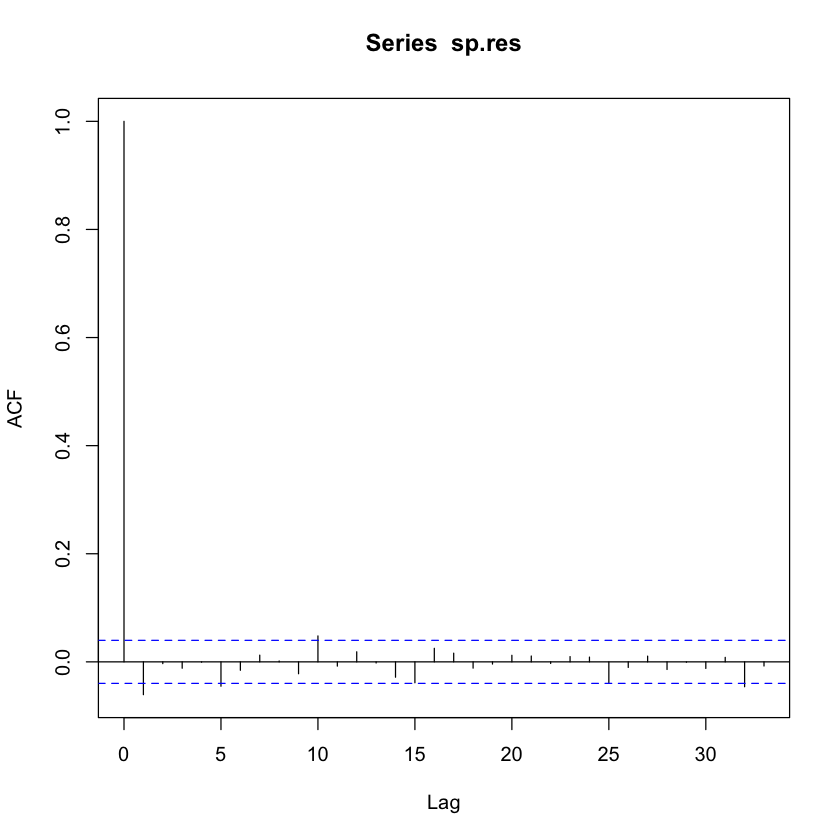

In [25]:
sp.garch <- garch(sp, trace=F)
sp.res <- sp.garch$res[-1]
acf(sp.res)

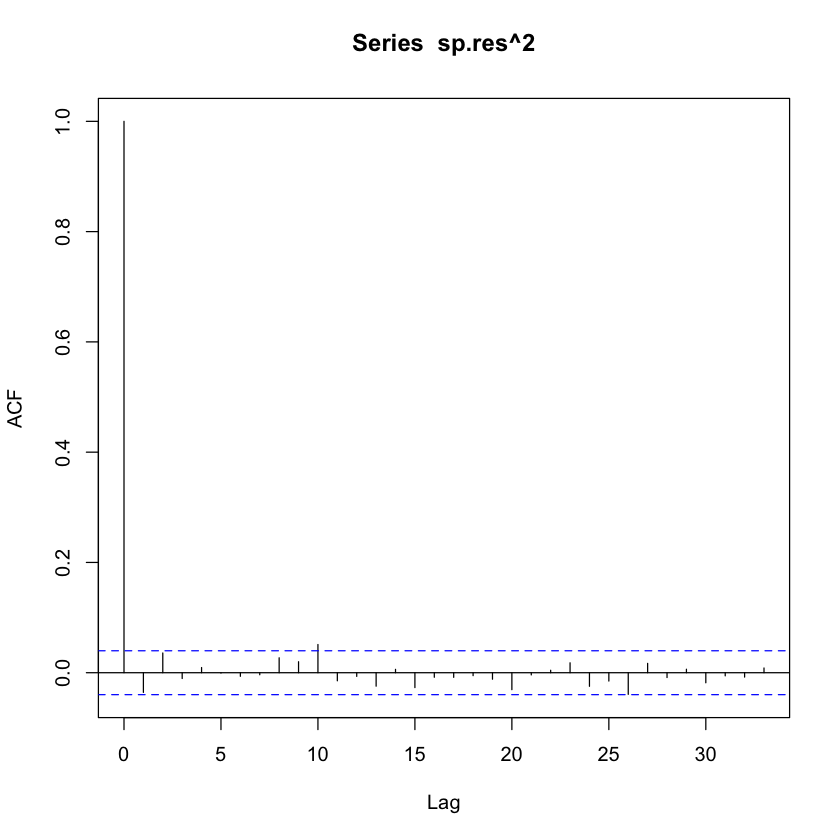

In [26]:
acf(sp.res^2)

We have explained the serial correlation present in the squared residuals with GARCH(p,q).  